## Importing Libs. of Python

In [63]:
'''  FOR ML MODELS '''

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
from matplotlib import image as img 
from scipy.stats import stats,mode
import seaborn as sns 

'''  for DL MODELS '''

import tensorflow as tf 
from tensorflow import keras 

In [65]:
''' GENERAL PRE-DEFINED FUNCTIONS '''

''' Load and show an image '''

def show(img) :
    i = plt.imread(img)
    plt.imshow(i)

''' Load a dataset '''

def load_data(file) :
    data = pd.read_csv(file)
    return data 

## Loading the Required Datasets

In [3]:
train_data  = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
print("Training Data  has size" , train_data
      .shape[0] , "rows & " , train_data.shape[1] , "cols")
print("Testing Data  has size" , test_data.shape[0] , "rows & " , test_data.shape[1] , "cols")

Training Data  has size 159256 rows &  24 cols
Testing Data  has size 106171 rows &  23 cols


In [5]:
train_data

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [7]:
train_data.isnull().sum()
''' CONCLUSION - No NULL values in the datatset '''

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [8]:
train_data.__dict__

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
        'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
        'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
        'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
        'ALT', 'Gtp', 'dental caries', 'smoking'],
       dtype='object')
 Axis 1: RangeIndex(start=0, stop=159256, step=1)
 NumericBlock: [ 4  5  6 16 18], 5 x 159256, dtype: float64
 NumericBlock: [ 0  1  2  3  7  8  9 10 11 12 13 14 15 17 19 20 21 22 23], 19 x 159256, dtype: int64,
 '_item_cache': {'id': 0              0
  1              1
  2              2
  3              3
  4              4
             ...  
  159251    159251
  159252    159252
  159253    159253
  159254    159254
  159255    159255
  Name: id, Length: 159256, dtype: int64,
  'age': 0         55
  1         70
  2         20
  3         35
  4         30
  

In [9]:
# relation of smoking with each property 

cols = train_data.columns[train_data.columns != ('smoking' or 'id')]


                          age  height(cm)  weight(kg)  waist(cm)  \
age                  1.000000   -0.489608   -0.336859  -0.045369   
height(cm)          -0.489608    1.000000    0.686645   0.409500   
weight(kg)          -0.336859    0.686645    1.000000   0.830208   
waist(cm)           -0.045369    0.409500    0.830208   1.000000   
eyesight(left)      -0.269495    0.209997    0.151794   0.046964   
eyesight(right)     -0.277638    0.216729    0.161344   0.055094   
hearing(left)        0.212889   -0.090110   -0.069761   0.004759   
hearing(right)       0.212972   -0.091760   -0.070679   0.006637   
systolic             0.160437    0.062297    0.241495   0.306150   
relaxation           0.064924    0.114390    0.265921   0.291389   
fasting blood sugar  0.191913    0.017516    0.132409   0.209541   
Cholesterol          0.106873   -0.113455    0.020382   0.075039   
triglyceride        -0.038063    0.252464    0.384313   0.394593   
HDL                  0.041411   -0.303450   -0.4

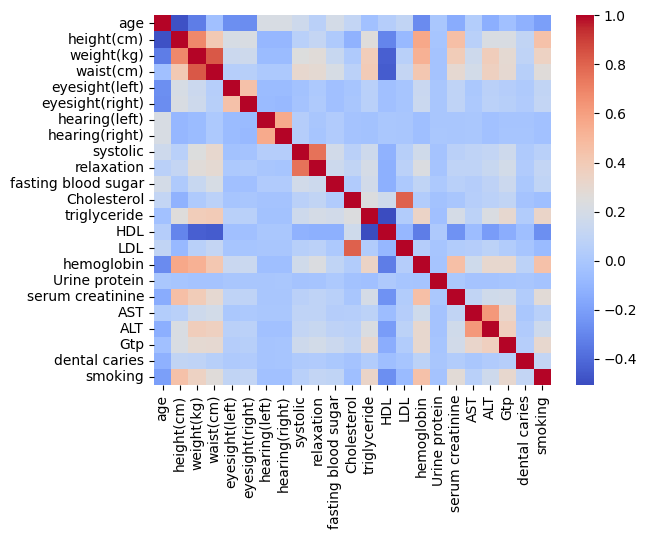

In [44]:

sns.heatmap(train_data.corr() , cmap = "coolwarm")
cor = pd.DataFrame(train_data.corr())
print(cor)
# High Corr of smoking with -> hameogobin , heigh and weight

In [11]:
''' CONCLUSION FROM DATAFRAME

EVEN WITH SAME VALUE OF FEATURES , NO DISTINCT LINEAR DECISION BOUNDARY IS VISIBLE IN ANY FEATURE WRT SMOKING CLASSES( 0 AND 1)

 '''



' CONCLUSION FROM DATAFRAME\n\nEVEN WITH SAME VALUE OF FEATURES , NO DISTINCT LINEAR DECISION BOUNDARY IS VISIBLE IN ANY FEATURE WRT SMOKING CLASSES( 0 AND 1)\n\n '

In [12]:
col = test_data['id']

In [13]:
''' Removing ID column from dataframe '''
train_data = train_data .drop(['id'] , axis =1)
test_data = test_data.drop(['id'] , axis =1 )

In [14]:
X_train = train_data.iloc[: , :22]
y_train = train_data['smoking']

X_test = test_data.iloc[: , :23]
y_train

0         1
1         0
2         1
3         0
4         1
         ..
159251    0
159252    0
159253    0
159254    1
159255    0
Name: smoking, Length: 159256, dtype: int64

In [15]:
# for column in X_train.columns :
#     pass


In [16]:
from sklearn.preprocessing import StandardScaler 

scale1 = StandardScaler()

scale2 = StandardScaler()
X_train[['height(cm)', 'weight(kg)', 'waist(cm)' , 'fasting blood sugar', 'Cholesterol', 'triglyceride']] = scale1.fit_transform(X_train[['height(cm)' ,'weight(kg)', 'waist(cm)' , 'fasting blood sugar', 'Cholesterol', 'triglyceride']] )
# X_train = X_train[['height(cm)', 'weight(kg)' ,'Cholesterol']]
X_test[['height(cm)', 'weight(kg)', 'waist(cm)' , 'fasting blood sugar', 'Cholesterol', 'triglyceride']] = scale2.fit_transform(X_test[['height(cm)' ,'weight(kg)', 'waist(cm)' , 'fasting blood sugar', 'Cholesterol', 'triglyceride']] )


'''  WE ONLY CHOSE The CONTINUOUS VALUES TO SCALE , ACCORDING to the highest positive / highest negative correlation '''

In [17]:
x = pd.DataFrame(X_train)
x

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,55,-0.030268,-0.567581,-0.223489,0.5,0.6,1,1,135,87,...,2.604429,40,75,16.5,1,1.0,22,25,27,0
1,70,-0.030268,-0.170319,0.669577,0.6,0.7,2,2,146,83,...,-1.097105,57,126,16.2,1,1.1,27,23,37,1
2,20,0.536694,0.624205,-0.223489,0.4,0.5,1,1,118,75,...,1.048274,45,93,17.4,1,0.8,27,31,53,0
3,35,1.670617,2.213252,2.455708,1.5,1.2,1,1,131,88,...,1.138923,38,102,15.9,1,1.0,20,27,30,1
4,30,-0.030268,-0.567581,-0.279305,1.5,1.0,1,1,121,76,...,-0.613639,44,93,15.4,1,0.8,19,13,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,-1.164191,-1.759366,-1.563087,1.5,2.0,1,1,127,80,...,-1.217971,72,159,14.5,1,0.8,25,26,13,0
159252,50,-1.164191,0.624205,-0.111855,1.0,1.0,1,1,120,80,...,1.123815,64,108,14.5,1,0.6,21,20,18,0
159253,40,-0.597229,-1.362104,-1.897986,1.5,1.0,1,1,114,70,...,-1.248188,87,93,10.9,1,0.6,15,9,12,0
159254,50,-0.030268,0.624205,1.004477,1.2,1.0,1,1,121,90,...,0.307967,55,80,14.4,1,1.1,22,17,37,0


In [18]:
y_train

0         1
1         0
2         1
3         0
4         1
         ..
159251    0
159252    0
159253    0
159254    1
159255    0
Name: smoking, Length: 159256, dtype: int64

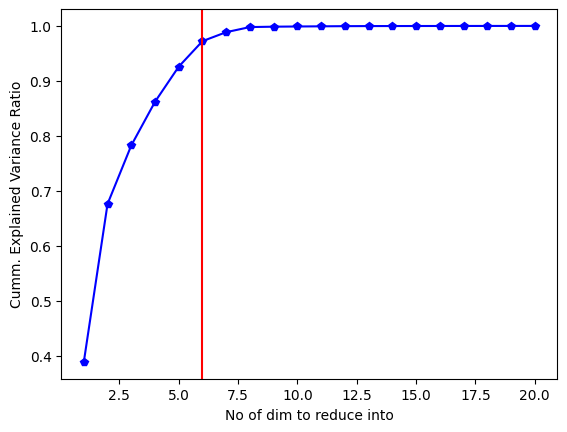

CONCLUSION - ELBOW POINT AT N = 6 , HENCE Optimum No. of Dim  = 10 for dataset to be reduced into 


In [19]:
from sklearn.decomposition import PCA


dim = []
sum= 0

for n in range(1,21) :
    pca = PCA(n_components = n)
    pca.fit(X_train)
    
    t = list(pca.explained_variance_ratio_) # y-value - proportion of total variance preserved
    sum+=t[-1]
    dim.append(sum)

plt.plot(range(1,21) , dim , marker='p', linestyle='-', color='b')
plt.axvline(x = 6 , color  = 'r')
plt.xlabel("No of dim to reduce into")
plt.ylabel("Cumm. Explained Variance Ratio")
plt.show()

print("CONCLUSION - ELBOW POINT AT N = 6 , HENCE Optimum No. of Dim  = 10 for dataset to be reduced into ")

In [20]:
# X_train = np.array(X_train)
pca1 = PCA(n_components = 6)
X_train = pca1.fit_transform(X_train)
# new feature dataset = X
X_train.shape

pca2 = PCA(n_components = 6)
X_test = pca2.fit_transform(X_test)


In [21]:
x = pd.DataFrame(X_train)
x

,0,1,2,3,4,5
0,-12.601565,-35.611551,8.264057,-25.254464,-8.706391,8.385986
1,3.587854,12.927033,-5.051657,-27.695487,12.613748,15.149442
2,14.532918,-25.177466,5.906671,8.753500,-16.081101,-16.713891
3,-4.919709,-10.717639,9.346187,-15.488934,-15.744152,-10.175667
4,-24.762018,-18.293662,-0.316337,-2.641717,-18.174482,-10.942524
...,...,...,...,...,...,...
159251,-15.554671,46.885385,0.145328,2.171486,15.930652,-11.306898
159252,-21.187395,-3.301214,-3.368535,-1.699094,6.497024,2.620671
159253,-36.288057,-18.846147,-17.736170,13.685327,18.445436,-7.651499
159254,-7.178669,-33.625145,-6.631426,-10.661815,-1.542818,3.380196


## Approach 1 - LOGISTIC REGRESSION 

In [22]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()

lr.fit(X_train , y_train )

LogisticRegression()

In [23]:
prediction = lr.predict(X_test)
prediction_proba = lr.predict_proba(X_test)
#np.set_printoptions(threshold=np.inf)
# prediction

In [24]:
prediction_proba

array([[0.46323851, 0.53676149],
       [0.71546124, 0.28453876],
       [0.51884889, 0.48115111],
       ...,
       [0.6189175 , 0.3810825 ],
       [0.56250533, 0.43749467],
       [0.72784357, 0.27215643]])

In [25]:
prediction

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
# from sklearn.metrics import confusion_matrix

# conf_mat1 = confusion_matrix(prediction , y_test)

In [27]:
# col = np.array(col)
# prediction = np.array(prediction)

# col = col.reshape(-1 , 1)
# prediction  = prediction.reshape(-1 , 1)

# sol = np.concatenate((col , prediction) , axis=1  )

# sol = pd.DataFrame(sol , columns  =['id' , 'smoking'])
# res = sol.to_csv("solution.csv")


## Approach 2 - Using SGD Classifier 

In [28]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

sgd_clf.fit(X_train , y_train)

SGDClassifier()

In [29]:
prediction_clf = sgd_clf.predict(X_test)


## Approach 3 -  SVM

In [30]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC()
lin_svc.fit(X_train , y_train) # hinge loss , 

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [31]:
prediction_svc = lin_svc.predict(X_test)

In [32]:
prediction_svc

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [52]:
''' Using the kernel of SVM , we know the SVM is a linear classifier (uses linear decision boundary )'''

' Using the kernel of SVM , we know the SVM is a linear classifier (uses linear decision boundary )'

## Approach 3 - Using Artificial Neural networks 

In [33]:
model = keras.Sequential([
    # keras.layers.Input( shape=(10 , )) . 
    keras.layers.Dense(6, activation = "relu" , input_dim = 6) , 
    
    keras.layers.Dense(8 , activation="relu") ,
    keras.layers.Dense(10 , activation="relu") ,
     keras.layers.Dense(8 , activation="relu") ,
    keras.layers.Dense(1 , activation="sigmoid")
]    
)

In [34]:
model.compile(optimizer = "adam" , loss="binary_crossentropy" , metrics =["accuracy"])

In [35]:
model.fit(X_train , y_train , epochs = 30 , validation_split=0.2 )

Epoch 1/30
3982/3982 [==============================] - 7s 2ms/step - loss: 0.5638 - accuracy: 0.7024 - val_loss: 0.5452 - val_accuracy: 0.7173
Epoch 2/30
3982/3982 [==============================] - 7s 2ms/step - loss: 0.5419 - accuracy: 0.7192 - val_loss: 0.5416 - val_accuracy: 0.7210
Epoch 3/30
3982/3982 [==============================] - 7s 2ms/step - loss: 0.5393 - accuracy: 0.7197 - val_loss: 0.5406 - val_accuracy: 0.7210
Epoch 4/30
3982/3982 [==============================] - 7s 2ms/step - loss: 0.5370 - accuracy: 0.7217 - val_loss: 0.5378 - val_accuracy: 0.7212
Epoch 5/30
3982/3982 [==============================] - 7s 2ms/step - loss: 0.5357 - accuracy: 0.7214 - val_loss: 0.5362 - val_accuracy: 0.7209
Epoch 6/30
3982/3982 [==============================] - 7s 2ms/step - loss: 0.5347 - accuracy: 0.7216 - val_loss: 0.5348 - val_accuracy: 0.7225
Epoch 7/30
3982/3982 [==============================] - 7s 2ms/step - loss: 0.5339 - accuracy: 0.7223 - val_loss: 0.5343 - val_accuracy:

In [36]:
prediction_nn = (model.predict(X_test) > 0.5).astype('int32')

3318/3318 [==============================] - 3s 948us/step


In [37]:
prediction_nn

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [38]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first neural network")

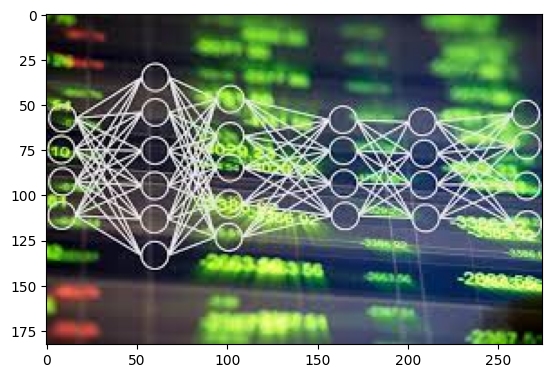

In [64]:
x = plt.imread("hft.jpeg")
plt.imshow(x)


In [39]:
col = np.array(col)
prediction = np.array(prediction)

col = col.reshape(-1 , 1)
prediction_svc  = prediction_svc.reshape(-1 , 1)

sol = np.concatenate((col , prediction_svc) , axis=1  )

sol = pd.DataFrame(sol , columns  =['id' , 'smoking'])
res = sol.to_csv("solution4.csv")

## Ensemble - Collecting all the results 

In [40]:
prediction
prediction_clf
prediction_svc
prediction_nn
pred = []

prediction = prediction.reshape(-1 , 1)
prediction_clf = prediction_clf.reshape(-1 , 1)
prediction_nn = prediction_nn.reshape(-1 , 1)
prediction_svc = prediction_svc.reshape(-1 , 1)
prediction.shape

arr = np.hstack([prediction , prediction_clf , prediction_nn , prediction_svc]).T

arr = arr.reshape( 106171, 4)
majority_voted_class , _  = mode(arr , axis=1)


C:\Users\HP\AppData\Local\Temp\ipykernel_6016\808038355.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_voted_class , _  = mode(arr , axis=1)


In [41]:
# for j in range(prediction.shape[0]-1) :
#     pred.append(np.argmax(prediction[j ,0 ] ,prediction_clf[j , 0]  , prediction_nn[j , 0]   , prediction_svc[j , 0]   ))
    
# pred

majority_voted_class 


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [42]:
col = np.array(col)
prediction = np.array(prediction)

col = col.reshape(-1 , 1)
majority_voted_class  = majority_voted_class.reshape(-1 , 1)

sol = np.concatenate((col , majority_voted_class) , axis=1  )

sol = pd.DataFrame(sol , columns  =['id' , 'smoking'])
res = sol.to_csv("solution5.csv")

## DEPLOYMENT IN KERNEL 

In [46]:
'''  INPUTS '''

height = input("Enter the height")
weight = input("Enter the weight")
weight = input("Enter the weight")
weight = input("Enter the weight")

'''  OUTPUTS '''
# x = np.array(height , weight )
out = model.predict(train_data[0])

print(out)

KeyError: 0